In [ ]:
#objective: Can you predict the fuel-efficieny of a car?

In [2]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [40]:
#load data
df = pd.read_table('../datasets/auto_mpg.data', sep=",", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,18.0,8,307.0,NaN,130.0,NaN,3504.0,NaN,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,NaN,165.0,NaN,3693.0,NaN,11.5,70,1,buick skylark 320
2,18.0,8,318.0,NaN,150.0,NaN,3436.0,NaN,11.0,70,1,plymouth satellite
3,16.0,8,304.0,NaN,150.0,NaN,3433.0,NaN,12.0,70,1,amc rebel sst
4,17.0,8,302.0,NaN,140.0,NaN,3449.0,NaN,10.5,70,1,ford torino


In [41]:
#DROP COLUMNS
df = df.drop([11,7,5,3],axis = 1)

In [6]:
df.head()

,0,1,2,4,6,8,9,10
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [42]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'accelaeration','model_year','origin']

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,accelaeration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [43]:
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()

In [44]:
df["cylinders"].unique()

array([8, 4, 6, 3, 5])

In [45]:
#encode columns (cylinders, model year, origin)
df_temp = df['cylinders']
df_cylinders = pd.get_dummies(df_temp, prefix='cylinder')
df_temp = df['model_year']
df_model_year = pd.get_dummies(df_temp, prefix='model')
df_temp = df['origin']
df_origin = pd.get_dummies(df_temp, prefix='country')

#drop first column
df_cylinders = df_cylinders.drop('cylinder_3',axis = 1)
df_model_year = df_model_year.drop('model_70',axis = 1)
df_origin = df_origin.drop('country_1',axis = 1)

In [46]:
#drop cylinders, model year and origin
df = df.drop(['cylinders','model_year','origin'],axis = 1)

In [47]:
scaler = preprocessing.StandardScaler()
to_scale_df = df[['displacement','horsepower','weight','accelaeration']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['displacement','horsepower','weight','accelaeration'])

In [48]:
#combine
df_new = pd.concat([df_cylinders, df_model_year, df_origin, scaled_df, df['mpg']], axis=1)
df_new.head()

,cylinder_4,cylinder_5,cylinder_6,cylinder_8,model_71,model_72,model_73,model_74,model_75,model_76,...,model_80,model_81,model_82,country_2,country_3,displacement,horsepower,weight,accelaeration,mpg
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.077290,0.664133,0.620540,-1.285258,18.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.488732,1.574594,0.843334,-1.466724,15.0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.182542,1.184397,0.540382,-1.648189,18.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.048584,1.184397,0.536845,-1.285258,16.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.029447,0.924265,0.555706,-1.829655,17.0


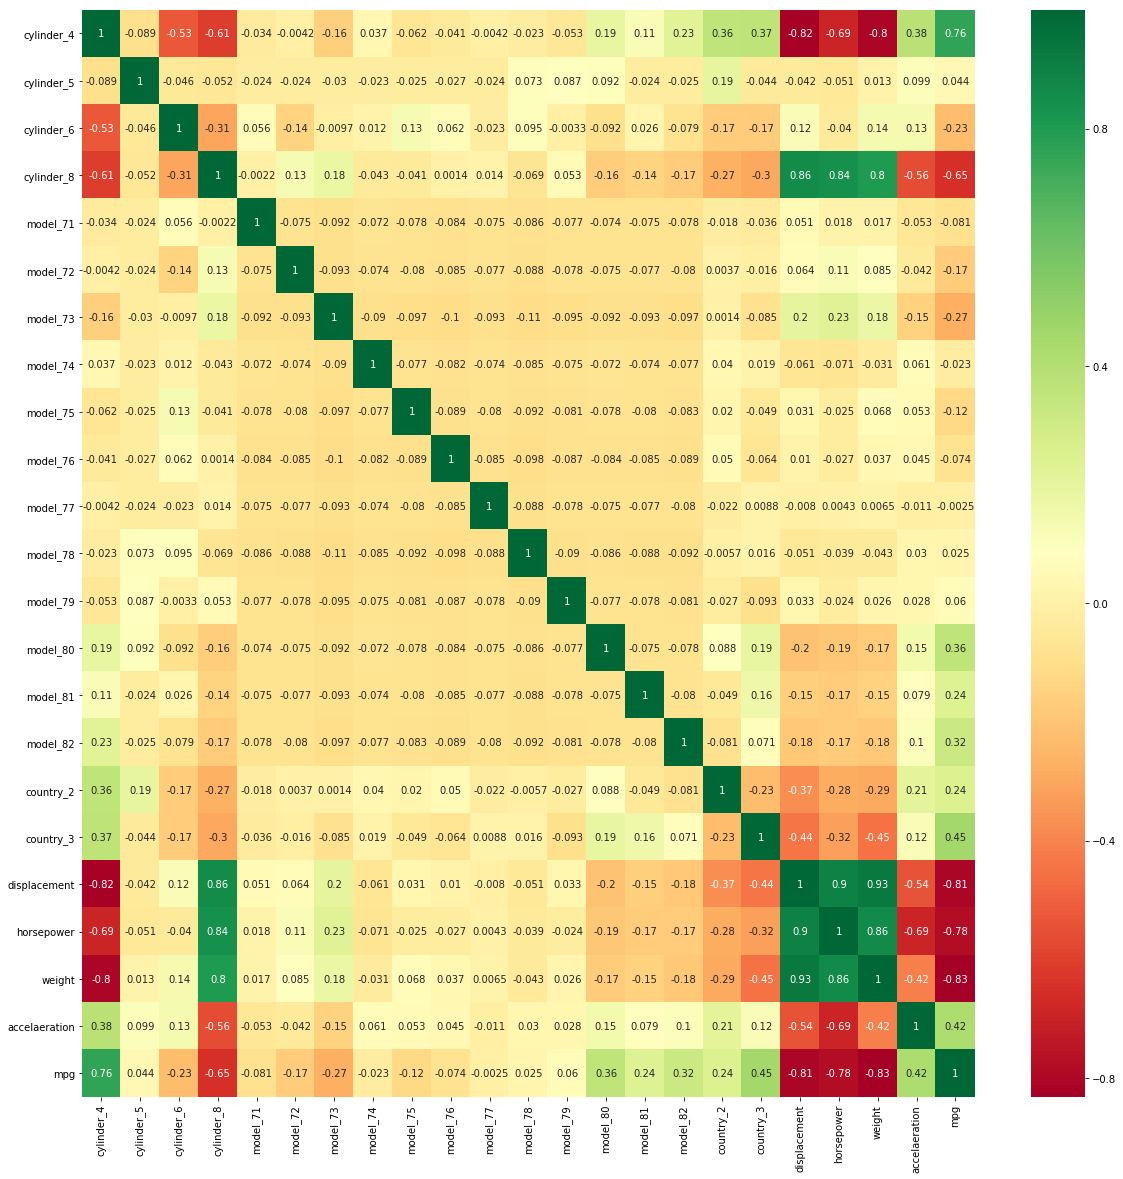

In [49]:
#check correlation
x = df_new.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [51]:
#build regression model
X = df_new.drop('mpg', axis=1)
y = df_new[['mpg']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [52]:
#calculate regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
#coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

The coefficient for cylinder_4 is 6.21029564423241
The coefficient for cylinder_5 is 5.9956810163129095
The coefficient for cylinder_6 is 3.6372259271959244
The coefficient for cylinder_8 is 6.705239390802072
The coefficient for model_71 is 1.1711241528991132
The coefficient for model_72 is -1.0024224850069166
The coefficient for model_73 is -0.5772273958985897
The coefficient for model_74 is 1.512906261453665
The coefficient for model_75 is 0.9563376472365375
The coefficient for model_76 is 1.3683500110824796
The coefficient for model_77 is 2.8778840995873414
The coefficient for model_78 is 3.3612057401189284
The coefficient for model_79 is 4.574025317754577
The coefficient for model_80 is 8.997694055131124
The coefficient for model_81 is 7.173191907023993
The coefficient for model_82 is 7.892808398712537
The coefficient for country_2 is 2.044853085545334
The coefficient for country_3 is 2.1567460506985134
The coefficient for displacement is 1.049368154071457
The coefficient for horse

In [54]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [55]:
#regression metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R2:', regr.score(X_test, y_test))

Mean Absolute Error: 2.4083301945632893
Mean Squared Error: 10.00333971897443
Root Mean Squared Error: 3.1628056720219835
R2: 0.859754195066928
